In [226]:
# 1- Load and understanding data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# load data
df= pd.read_csv('D:/mlProject/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [231]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [237]:
# This line checks for missing values in each column of the DataFrame
# It shows the total number of null (NaN) values per column
missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406


In [239]:
# This line fills missing values in the 'LotFrontage' column
# It replaces them with the median value of that column to reduce the effect of outliers
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())

Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406


C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\3126409240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


In [251]:
# Fill missing values for garage-related columns
df['GarageYrBlt'].fillna(0, inplace=True)  # أو df['YearBuilt'] لو تحب
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)

missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406


C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\895139450.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(0, inplace=True)  # أو df['YearBuilt'] لو تحب
C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\895139450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [253]:
# Fill missing values in the 'Electrical' column with the most frequent value (mode)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())


Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406


In [255]:
# تعويض MasVnrType و MasVnrArea
df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406


C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\2990044518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MasVnrType'].fillna('None', inplace=True)
C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\2990044518.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [257]:
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in bsmt_cols:
    df[col].fillna('NoBsmt', inplace=True)

missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406


C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\471885667.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('NoBsmt', inplace=True)


In [259]:
df['FireplaceQu'].fillna('NoFireplace', inplace=True)

missing = df.isnull().sum()
missing = missing[missing > 0]  # نعرض فقط الأعمدة اللي فيها بيانات ناقصة
print(missing.to_string())

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406


C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\298632303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('NoFireplace', inplace=True)


In [261]:
# Remove the specified columns from the DataFrame if they exist
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)


In [263]:
# Calculate the age of the house by subtracting 'YearBuilt' from 'YrSold'
df['Age'] = df['YrSold'] - df['YearBuilt']

In [265]:
# Display the first few rows of the 'YearBuilt', 'YrSold', and 'Age' columns
print(df[['YearBuilt', 'YrSold', 'Age']].head())


   YearBuilt  YrSold  Age
0       2003    2008    5
1       1976    2007   31
2       2001    2008    7
3       1915    2006   91
4       2000    2008    8


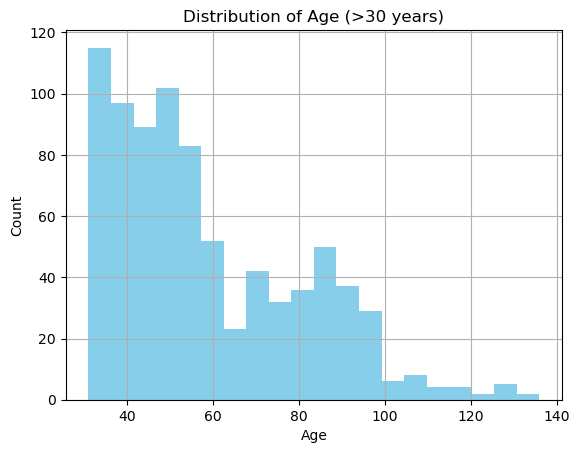

In [267]:
# Filter the DataFrame to include only houses built more than 30 years ago
df_age_30 = df[df['Age'] > 30]

# Plot 'YearBuilt' for the filtered data
plt.hist(df_age_30['Age'], bins=20, color='skyblue')
plt.title('Distribution of Age (>30 years)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [269]:
# Print the names of all columns in the DataFrame
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

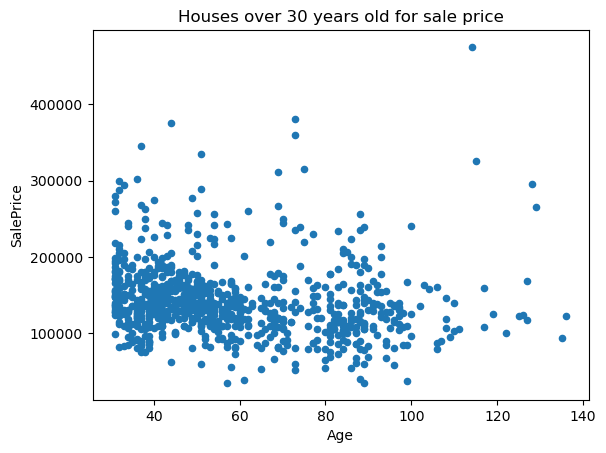

In [271]:
# Filter the DataFrame to include houses older than 30 years
df_age_30 = df[df['Age'] > 30]

# Create a scatter plot of 'Age' vs 'SalePrice' for houses over 30 years old
df_age_30.plot(kind='scatter', x='Age', y='SalePrice')

# Adding a title and labels to the plot
plt.title('Houses over 30 years old for sale price')
plt.xlabel('Age')  # X-axis label (Age)
plt.ylabel('SalePrice')  # Y-axis label (SalePrice)

# Display the plot
plt.show()


In [273]:
# Count the occurrences of each unique value in the 'Neighborhood' column
neighborhood_count = df['Neighborhood'].value_counts()

# Print the count of each neighborhood
print(neighborhood_count)


Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64


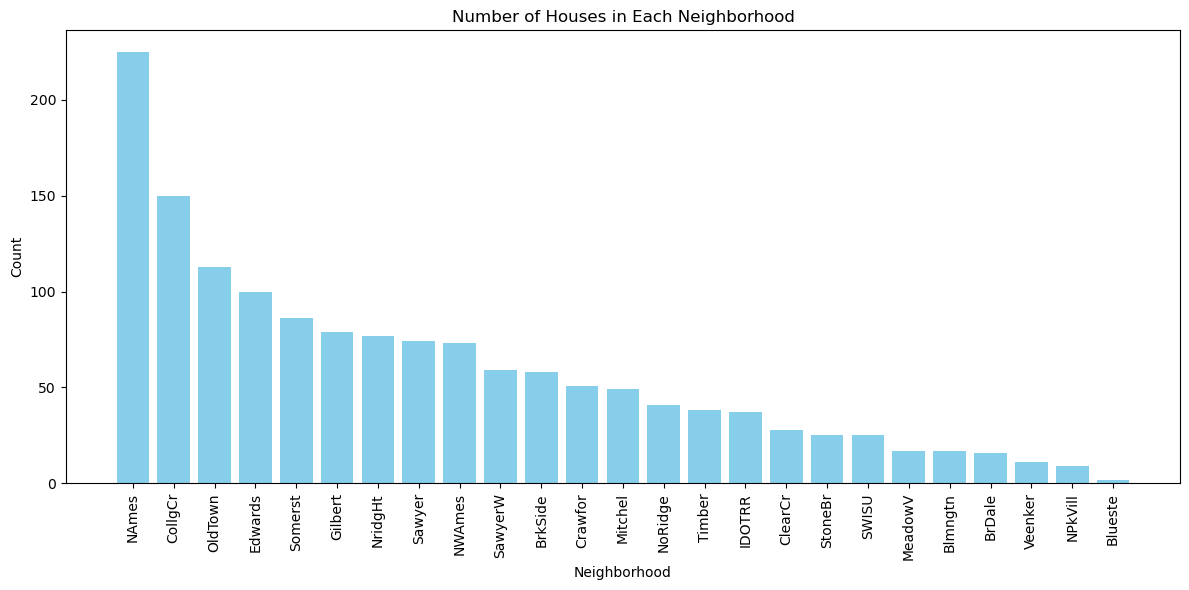

In [275]:
# Create a bar plot to visualize the count of houses in each neighborhood
plt.figure(figsize=(12,6))
plt.bar(neighborhood_count.index, neighborhood_count.values, color='skyblue')
plt.xticks(rotation=90)  # تدوير أسماء الأحياء
plt.title('Number of Houses in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.tight_layout()  # علشان ميحصلش تداخل في الكتابة
plt.show()




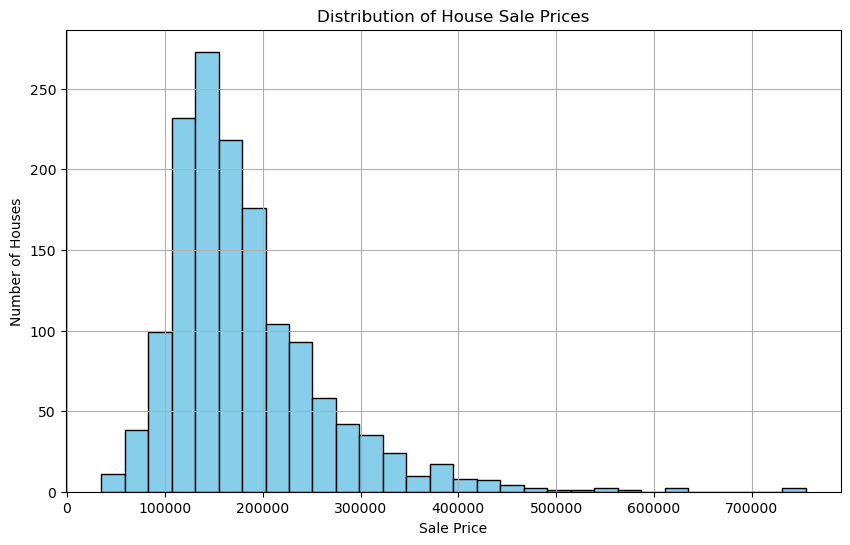

In [277]:
plt.figure(figsize=(10,6))
plt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Number of Houses')
plt.grid(True)
plt.show()



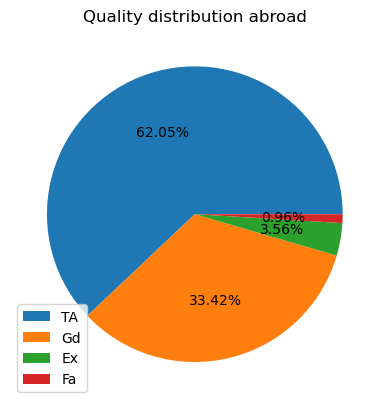

In [279]:
# Count the occurrences of each unique value in the 'ExterQual' column
exterqual_count = df['ExterQual'].value_counts()

# Create a pie chart to visualize the distribution of exterior quality
plt.pie(exterqual_count, autopct="%0.2f%%")  # Display percentage on the pie slices
plt.legend(exterqual_count.index)  # Add a legend with the categories
plt.title('Quality distribution abroad')  # Title of the plot
plt.show()  # Display the pie chart


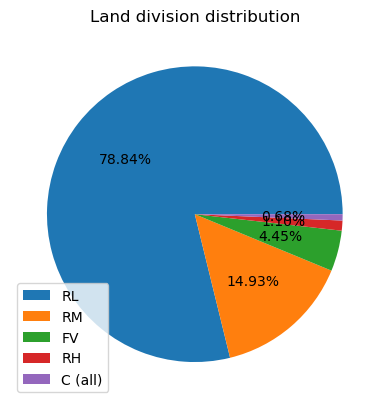

In [281]:
# Count the occurrences of each unique value in the 'MSZoning' column
mszoning_count = df['MSZoning'].value_counts()

# Create a pie chart to visualize the distribution of land zoning types
plt.pie(mszoning_count, autopct="%0.2f%%")  # Display percentage on the pie slices
plt.legend(mszoning_count.index)  # Add a legend with the categories
plt.title('Land division distribution')  # Title of the plot
plt.show()  # Display the pie chart



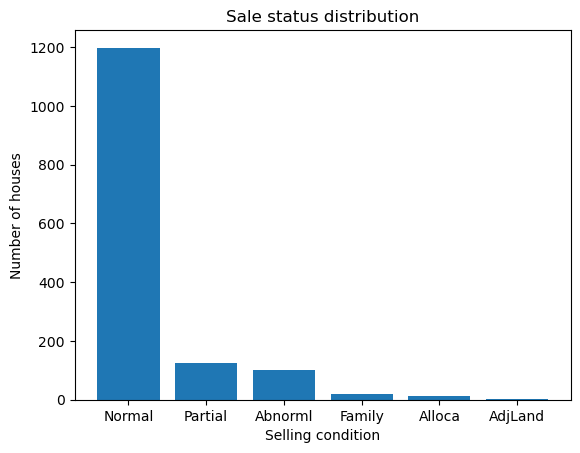

In [283]:
# Count the occurrences of each unique value in the 'SaleCondition' column
sale_condition_count = df['SaleCondition'].value_counts()

# Create a bar chart to visualize the distribution of sale conditions
plt.bar(sale_condition_count.index, sale_condition_count.values)

# Adding title and labels to the plot
plt.title('Sale status distribution')  # Title of the plot
plt.xlabel('Selling condition')  # Label for the x-axis
plt.ylabel('Number of houses')  # Label for the y-axis

# Display the plot
plt.show()



In [285]:
# Select columns with numerical data types from the DataFrame
number_columns = df.select_dtypes(include='number').columns

# Display the list of numerical columns
number_columns


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Age'],
      dtype='object')

In [287]:
# Select columns with object (categorical) data types from the DataFrame
object_columns = df.select_dtypes(include='object').columns

# Display the list of object (categorical) columns
object_columns


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [289]:
# Calculate the correlation matrix for numerical columns in the DataFrame
df[number_columns].corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,0.012724
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.028746
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,...,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771,-0.116223
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.014832
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.572629
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,0.377325
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,-0.999036
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,-0.590360
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614,-0.311479
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,-0.248483


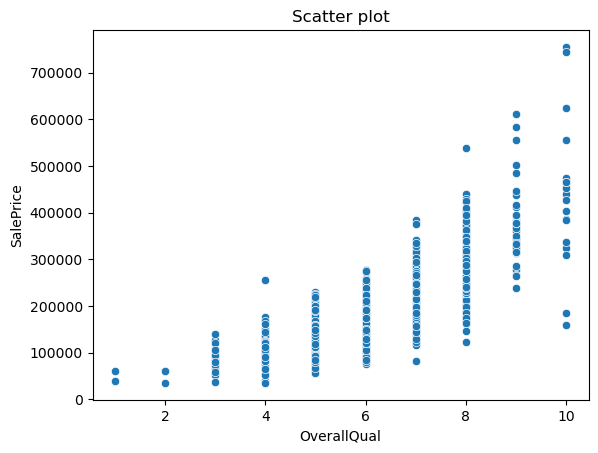

In [291]:
# Create a scatter plot to visualize the relationship between 'OverallQual' and 'SalePrice'
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

# Adding title and labels to the plot
plt.title("Scatter plot")  # Title of the plot
plt.xlabel("OverallQual")  # Label for the x-axis
plt.ylabel("SalePrice")  # Label for the y-axis

# Display the plot
plt.show()


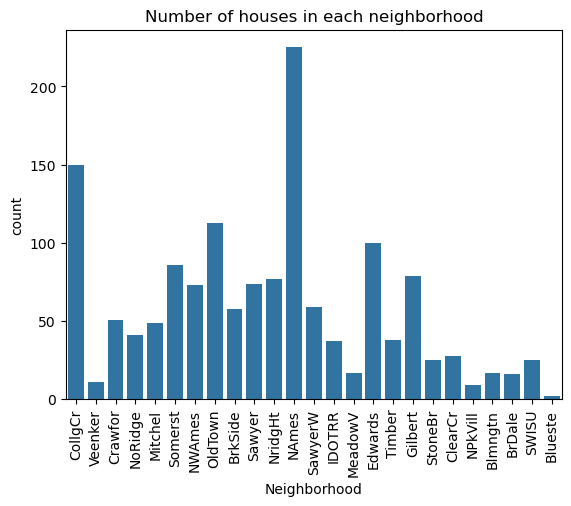

In [293]:
# Create a count plot to visualize the number of houses in each neighborhood
sns.countplot(data=df, x='Neighborhood')

# Rotate x-axis labels to make them readable
plt.xticks(rotation=90)

# Adding title to the plot
plt.title("Number of houses in each neighborhood")

# Display the plot
plt.show()


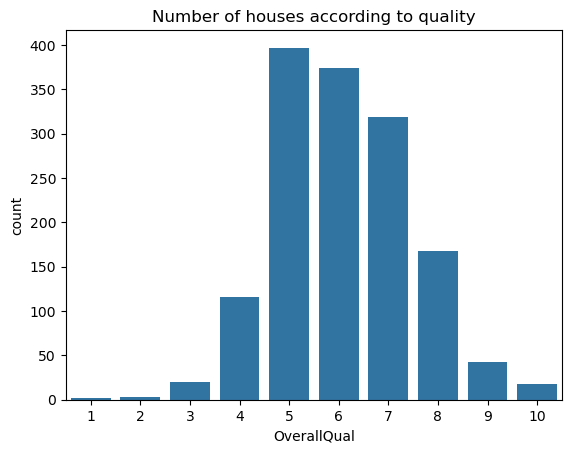

In [295]:
# Create a count plot to visualize the number of houses according to their overall quality
sns.countplot(data=df, x='OverallQual')

# Adding title to the plot
plt.title("Number of houses according to quality")

# Display the plot
plt.show()


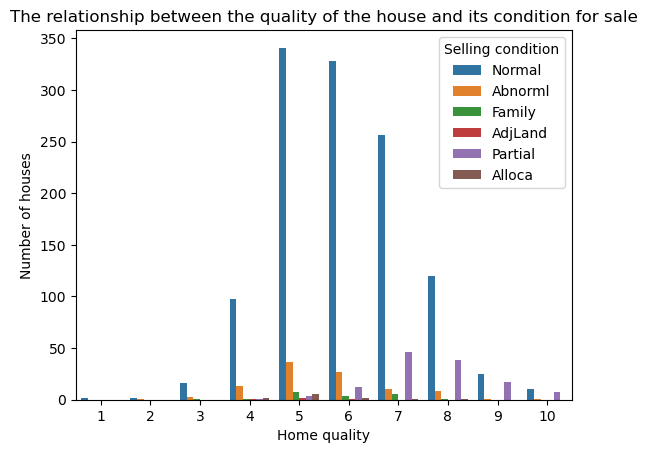

In [297]:
# Create a count plot to visualize the relationship between house quality ('OverallQual') and sale condition ('SaleCondition')
sns.countplot(data=df, x='OverallQual', hue='SaleCondition')

# Adding title and labels to the plot
plt.title("The relationship between the quality of the house and its condition for sale")  # Title
plt.xlabel("Home quality")  # Label for the x-axis
plt.ylabel("Number of houses")  # Label for the y-axis

# Add a legend with the title 'Selling condition'
plt.legend(title='Selling condition')

# Display the plot
plt.show()


In [299]:
# ملء القيم الفارغة المتبقية
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\1967493685.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\yossef\AppData\Local\Temp\ipykernel_7080\1967493685.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [301]:
# 4. تحويل النصوص إلى أرقام (one-hot encoding)
df = pd.get_dummies(df)

In [303]:
# 5. تحديد المتغيرات المستقلة والتابعة
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [305]:
# 6. تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [307]:
# 7. بناء النموذج
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [308]:
# 8. التقييم
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)

MSE: 833366590.215772
RMSE: 28868.089479835206
R^2 Score: 0.8913518711322989


In [309]:
# 9. تجربة تنبؤ جديد
# نأخذ أول بيت من مجموعة الاختبار كعينة
sample = X_test.iloc[0:1]
predicted_price = model.predict(sample)
print("Predicted price for sample house:", predicted_price[0])

Predicted price for sample house: 140786.33333333334
